# Project Description


This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an
algorithm that predicts the number of wins for a given team in the 2015 season based on
several different indicators of success. There are 16 different features that will be used as the
inputs to the machine learning and the output will be a value that represents the number of
wins. 
-- Input features-
1. W - This indicates the number of Wins credited to a pitcher: number of games where
pitcher was pitching while their team took the lead and went on to win, also the starter
needs to pitch at least 5 innings of work.
2. R - This indicates Runs scored. A run is scored when a player advances around first,
second and third base and returns safely to home plate, touching the bases in that order,
before three outs are recorded and all obligations to reach base safely on batted balls
are met or assured: number of times a player crosses home plate.
3. AB - This means At bat or time at bat. It&#39;s is a batter&#39;s turn batting against a pitcher: plate
appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or
obstruction.
4. H - This means Hit. It&#39;s also called a &quot;base hit&quot;, is credited to a batter when the batter
safely reaches or passes first base after hitting the ball into fair territory, without the
benefit of either an error or a fielder&#39;s choice: reaching base because of a batted, fair ball
without error by the defense.
5. 2B - This means the act of a batter striking the pitched ball and safely reaching second
base without being called out by the umpire, without the benefit of a fielder&#39;s misplay
(see error) or another runner being put out on a fielder&#39;s choice. A double is a type of hit
(the others being the single, triple and home run) and is sometimes called a &quot;two-
bagger&quot; or &quot;two-base hit&quot;: hits on which the batter reaches second base safely without
the contribution of a fielding error.
6. 3B - This measns a Triple.It&#39;s is the act of a batter safely reaching third base after hitting
the ball, with neither the benefit of a fielder&#39;s misplay nor another runner being put out on
a fielder&#39;s choice. A triple is sometimes called a &quot;three-bagger&quot; or &quot;three-base hit&quot;: hits
on which the batter reaches third base safely without the contribution of a fielding error.
7. HR - This means Home runs. It&#39;s scored when the ball is hit in such a way that the batter
is able to circle the bases and reach home plate safely in one play without any errors
being committed by the defensive team. A home run is usually achieved by hitting the
ball over the outfield fence between the foul poles (or hitting either foul pole) without the
ball touching the field: hits on which the batter successfully touched all four bases,
without the contribution of a fielding error.

8. BB - This means Base on balls (also called a &quot;walk&quot;). It occurs in baseball when a batter
receives four pitches that the umpire calls balls, and is in turn awarded first base without
the possibility of being called out: hitter not swinging at four pitches called out of the
strike zone and awarded first base.
9. SO - Also denoted as &quot;K&quot; means Strikeout. It occurs when a batter accumulates three
strikes during a time at bat. It usually means that the batter is out: number of batters who
received strike three.
10. SB - This means Stolen base. It occurs when a runner advances to a base to which they
are not entitled and the official scorer rules that the advance should be credited to the
action of the runner: number of bases advanced by the runner while the ball is in the
possession of the defense.
11. RA - This means Run Average. It refer to measures of the rate at which runs are allowed
or scored.
12. ER - This means Earned run. It refers to any run that was fully enabled by the offensive
team&#39;s production in the face of competent play from the defensive team: number of runs
that did not occur as a result of errors or passed balls.
13. ERA - This means Earned Run Average. It refers to the average of earned runs allowed
by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is
determined by dividing the number of earned runs allowed by the number of innings
pitched and multiplying by nine: total number of earned runs (see &quot;ER&quot; above), multiplied
by 9, divided by innings pitched.
14. CG - This means Complete Game. It&#39;s the act of a pitcher pitching an entire game
without the benefit of a relief pitcher. A pitcher who meets this criterion will be credited
with a complete game regardless of the number of innings played: number of games
where player was the only pitcher for their team.
15. SHO - This means Shutout. It refers to the act by which a single pitcher pitches a
complete game and does not allow the opposing team to score a run: number of
complete games pitched with no runs allowed.
16. SV - This means Save. It&#39;s credited to a pitcher who finishes a game for the winning
team under certain prescribed circumstances: number of games where the pitcher
enters a game led by the pitcher&#39;s team, finishes the game without surrendering the
lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the
pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or
(c) the pitcher pitched three or more innings.
17. E - This means Errors. It&#39;s an act, in the judgment of the official scorer, of a fielder
misplaying a ball in a manner that allows a batter or baserunner to advance one or more
bases or allows a plate appearance to continue after the batter should have been put
out. The term error is sometimes used to refer to the play during which an error was
committed: number of times a fielder fails to make a play he should have made with
common effort, and the offense benefits as a result.

-- Output: Number of predicted wins (W)
To understand the columns meaning, follow the link given below to understand the baseball
statistics: https://en.wikipedia.org/wiki/Baseball_statistics

In [370]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE


In [156]:
!pip install imbalanced-learn

In [371]:
#importing Train dataset

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [158]:
# Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, 
# Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

#R – Runs scored: number of times a player crosses home plate
#AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
#H – Hit: reaching base because of a batted, fair ball without error by the defense
#2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error
#3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
#HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
#BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.
#SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense
#RA - Opponents runs scored
#ER - Earned runs allowed
#ERA - Earned run average
#CG - Complete games
# SHO - Shutouts  /To achieve a shutout, a pitcher must pitch a complete game without allowing the other team to score a run.
# SV - Saves
# E - Errors

In [372]:
#Renaming columns in the df table

df1 = pd.DataFrame(df, columns = ['W','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E'])
df1 = df.rename(columns = {'W':'Wins','R':'Runs','AB':'At_Bat','H':'Hit','2B':'2B_Doubles','3B':'3B_Triples','HR':'Home_Run','BB':'Base_on_ball','SO':'Strike_out','SB':'Stolen_base','RA':'Runs_allowed'
                        ,'ER':'Earned_run','ERA':'Earned_runs_average','CG':'Complete_games','SHO':'Shutouts','SV':'Saves','E':'Errors'})
print(df1)

    Wins  Runs  At_Bat   Hit  2B_Doubles  3B_Triples  Home_Run  Base_on_ball  \
0     95   724    5575  1497         300          42       139           383   
1     83   696    5467  1349         277          44       156           439   
2     81   669    5439  1395         303          29       141           533   
3     76   622    5533  1381         260          27       136           404   
4     74   689    5605  1515         289          49       151           455   
5     93   891    5509  1480         308          17       232           570   
6     87   764    5567  1397         272          19       212           554   
7     81   713    5485  1370         246          20       217           418   
8     80   644    5485  1383         278          32       167           436   
9     78   748    5640  1495         294          33       161           478   
10    88   751    5511  1419         279          32       172           503   
11    86   729    5459  1363         278

# Exploratory Data Analysis


In [373]:
#preprocessing data

df1.shape

(30, 17)

In [374]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Wins                 30 non-null     int64  
 1   Runs                 30 non-null     int64  
 2   At_Bat               30 non-null     int64  
 3   Hit                  30 non-null     int64  
 4   2B_Doubles           30 non-null     int64  
 5   3B_Triples           30 non-null     int64  
 6   Home_Run             30 non-null     int64  
 7   Base_on_ball         30 non-null     int64  
 8   Strike_out           30 non-null     int64  
 9   Stolen_base          30 non-null     int64  
 10  Runs_allowed         30 non-null     int64  
 11  Earned_run           30 non-null     int64  
 12  Earned_runs_average  30 non-null     float64
 13  Complete_games       30 non-null     int64  
 14  Shutouts             30 non-null     int64  
 15  Saves                30 non-null     int64

In [375]:
#checking for null values

df1.isnull().sum()

Wins                   0
Runs                   0
At_Bat                 0
Hit                    0
2B_Doubles             0
3B_Triples             0
Home_Run               0
Base_on_ball           0
Strike_out             0
Stolen_base            0
Runs_allowed           0
Earned_run             0
Earned_runs_average    0
Complete_games         0
Shutouts               0
Saves                  0
Errors                 0
dtype: int64

In [376]:
df1.columns.tolist()

['Wins',
 'Runs',
 'At_Bat',
 'Hit',
 '2B_Doubles',
 '3B_Triples',
 'Home_Run',
 'Base_on_ball',
 'Strike_out',
 'Stolen_base',
 'Runs_allowed',
 'Earned_run',
 'Earned_runs_average',
 'Complete_games',
 'Shutouts',
 'Saves',
 'Errors']

<AxesSubplot:>

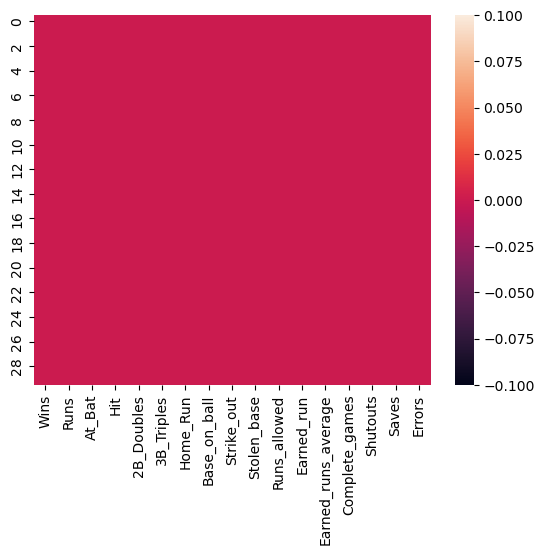

In [164]:
#lets visualize it using heatmap

sns.heatmap(df1.isnull())

#  Data Visualization 

In [383]:
#Seperating Numerical and Categorical columns

#checking for categorical columns

categorical_col = []
for i in df1.dtypes.index:
    if df1.dtypes[i]=="object":
        categorical_col.append(i)
print("categorical Columns:",categorical_col)

#checking for numerical columns

numerical_col = []
for i in df1.dtypes.index:
    if df1.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns:",numerical_col)

categorical Columns: []
Numerical Columns: ['Wins', 'Runs', 'At_Bat', 'Hit', '2B_Doubles', '3B_Triples', 'Home_Run', 'Base_on_ball', 'Strike_out', 'Stolen_base', 'Runs_allowed', 'Earned_run', 'Earned_runs_average', 'Complete_games', 'Shutouts', 'Saves', 'Errors']


In [377]:
#checking the value counts of each column

for i in df1.columns:
    print(df1[i].value_counts())
    print("\n")

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: Wins, dtype: int64


689    2
696    2
724    1
647    1
650    1
720    1
667    1
626    1
573    1
613    1
703    1
683    1
640    1
655    1
697    1
694    1
656    1
661    1
729    1
751    1
748    1
644    1
713    1
764    1
891    1
622    1
669    1
737    1
Name: Runs, dtype: int64


5485    2
5575    1
5631    1
5457    1
5649    1
5565    1
5385    1
5529    1
5420    1
5463    1
5428    1
5527    1
5571    1
5480    1
5491    1
5484    1
5467    1
5600    1
5544    1
5417    1
5459    1
5511    1
5640    1
5567    1
5509    1
5605    1
5533    1
5439    1
5572    1
Name: At_Bat, dtype: int64


1363    2
1497    1
1386    1
1324    1
1494    1
1486    1
1346    1
1374    1
1361    1
1420    1
1351    1
1382    1
1378    1
1341    1
1462    1
1405    1

In [378]:
df1.describe()

,Wins,Runs,At_Bat,Hit,2B_Doubles,3B_Triples,Home_Run,Base_on_ball,Strike_out,Stolen_base,Runs_allowed,Earned_run,Earned_runs_average,Complete_games,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [379]:
#Target variable is W

df1.Wins.unique

<bound method Series.unique of 0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: Wins, dtype: int64>

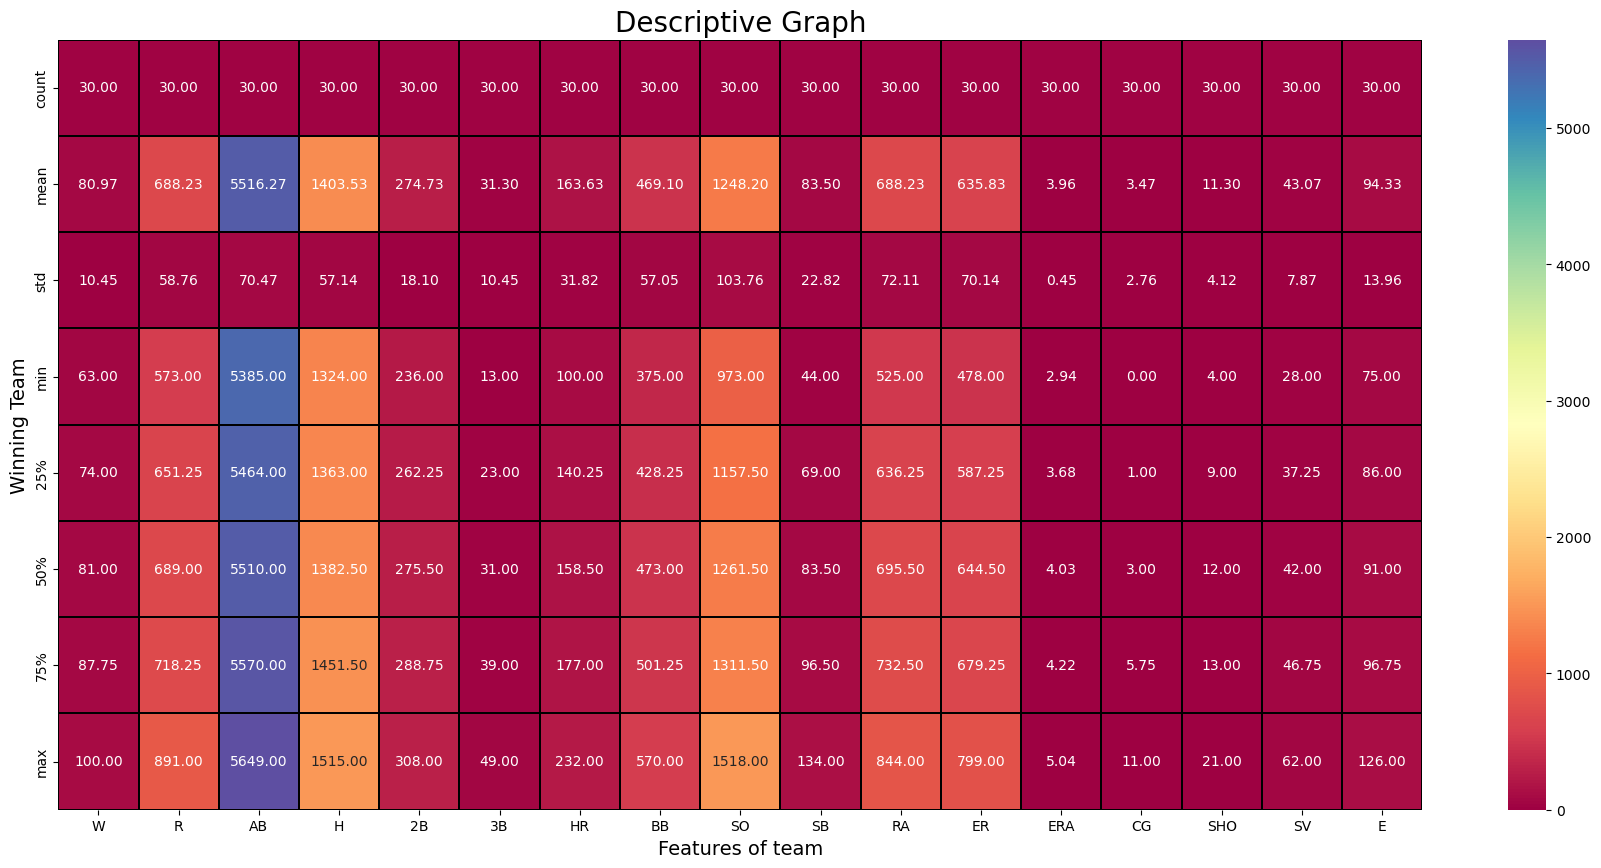

In [380]:
#Descriptive Graph of features and target variable of the team 

plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Features of team',fontsize=14)
plt.ylabel('Winning Team',fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()


#  Checking how the data has been distributed in each column


68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: Wins, dtype: int64


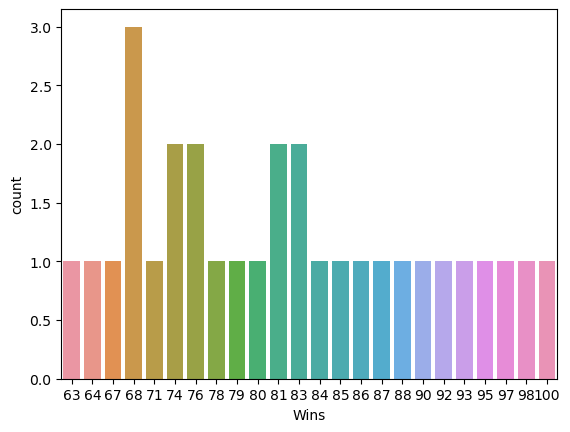

In [381]:
#visualize the number of Wins column

ax=sns.countplot(x= 'Wins',data=df1)
print(df1['Wins'].value_counts())


<AxesSubplot:xlabel='Wins', ylabel='Density'>

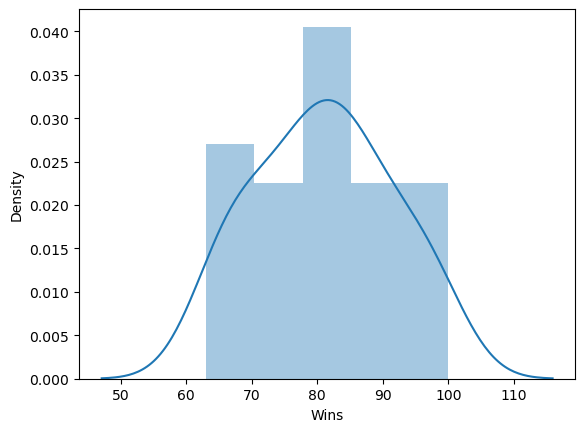

In [382]:
#Analyze the Target variable

sns.distplot(df1.Wins)

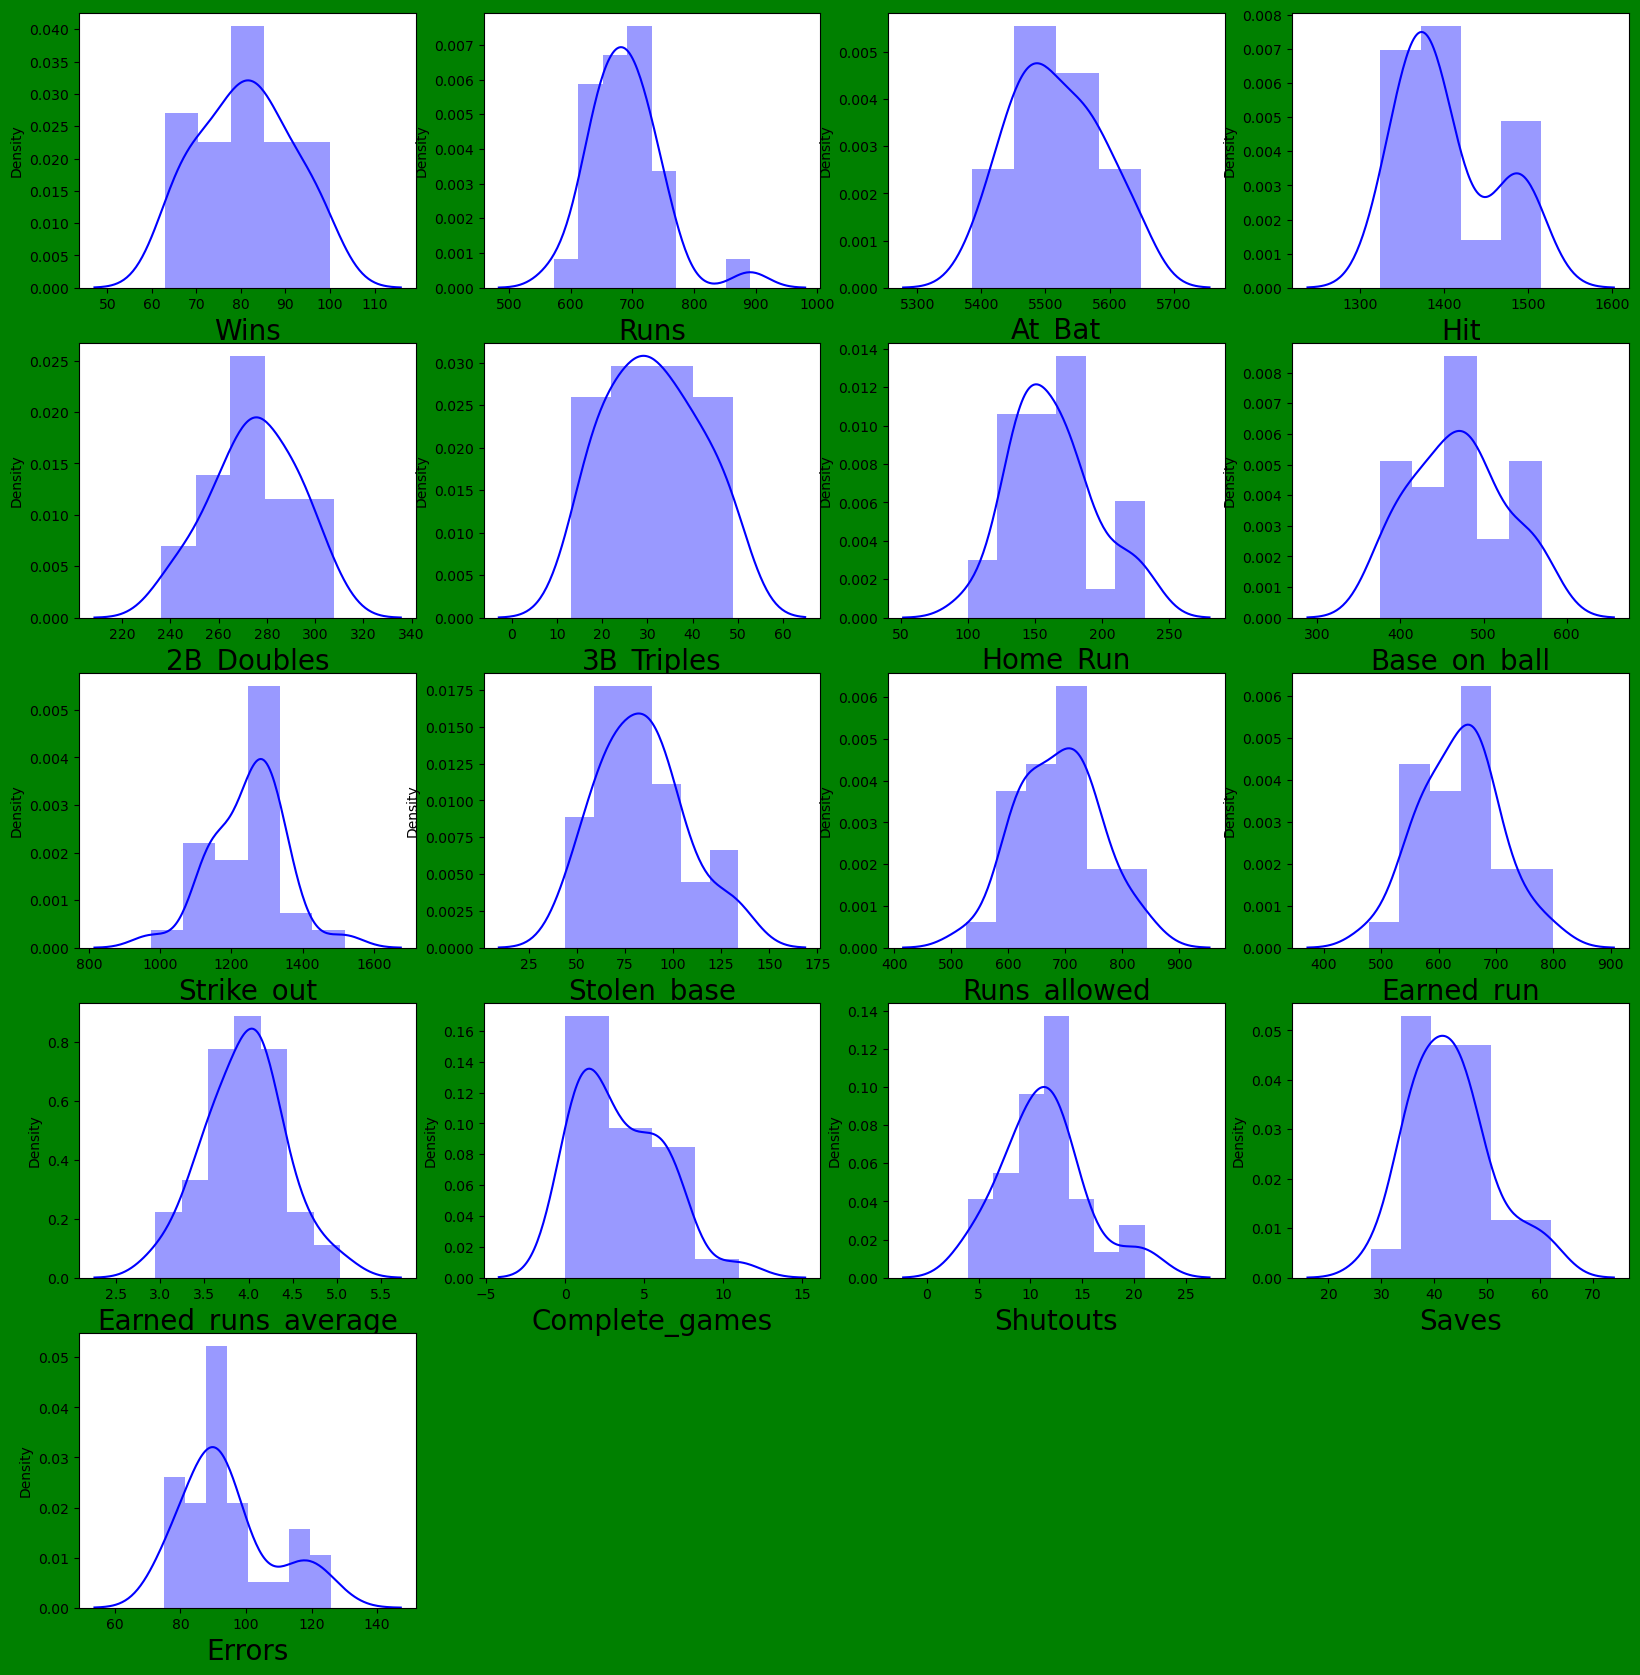

In [384]:
#Plotting feature variable column 

plt.figure(figsize=(20,25),facecolor="green")
plotnumber = 1

for column in numerical_col:
    if plotnumber <= 18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df1[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show() 


In [172]:
#Analysis of distribution of the features in the above graph according to graphical representation

#R  -  is right skewed data and 2 peaks
#AB  - normal distribution
#H - Bipolar distributed data
#2B  - slight left skewed data
#3B  - somehow normal distribution
#HR - skewness present on both side
#BB  - skewness present on both side
#SO  -skewness present on both sides
#SB - right side skewed
#RA - skewed data
#ER  - slight skewed data
#ERA - skewness present on both side
#CG - not a normal distributed data
#SHO- not noprmal distributed
#SV - right skewed
#E - Bipolar data


# # Visualizing the correlation between label and features using bar plot 

In [406]:
df1.corr()

,Wins,Runs,At_Bat,Hit,2B_Doubles,3B_Triples,Home_Run,Base_on_ball,Strike_out,Stolen_base,Runs_allowed,Earned_run,Earned_runs_average,Complete_games,Shutouts,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At_Bat,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hit,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B_Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B_Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Home_Run,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Base_on_ball,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strike_out,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen_base,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

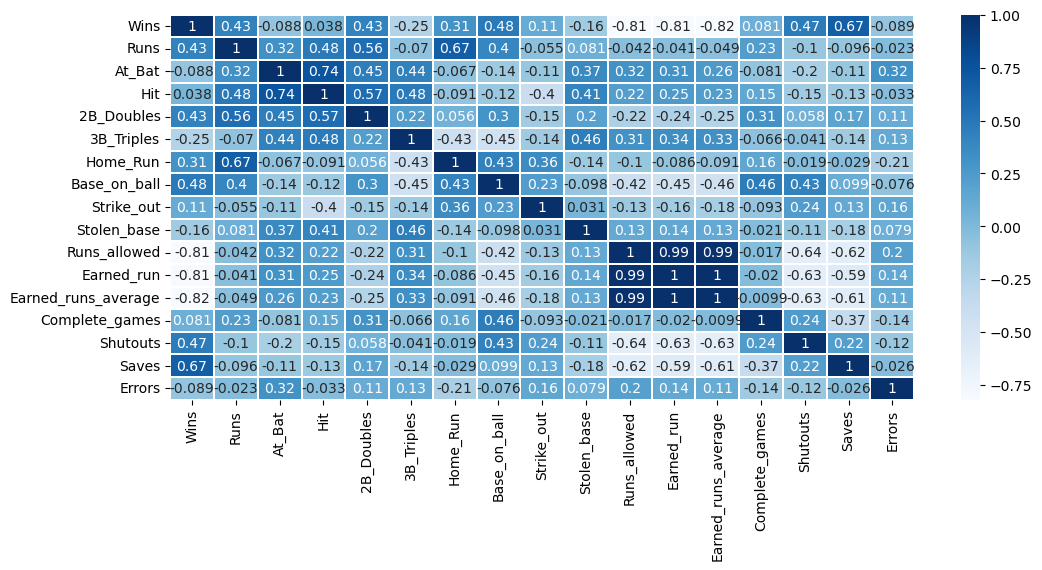

In [386]:
#Correlation Map#Correlation map to display the most correlated variables:


cor = df1.corr(method ="pearson")
f, ax=plt.subplots(figsize = (12,5))
sns.heatmap(df1.corr(),cmap="Blues",annot=True, ax= ax,linewidth=.25)

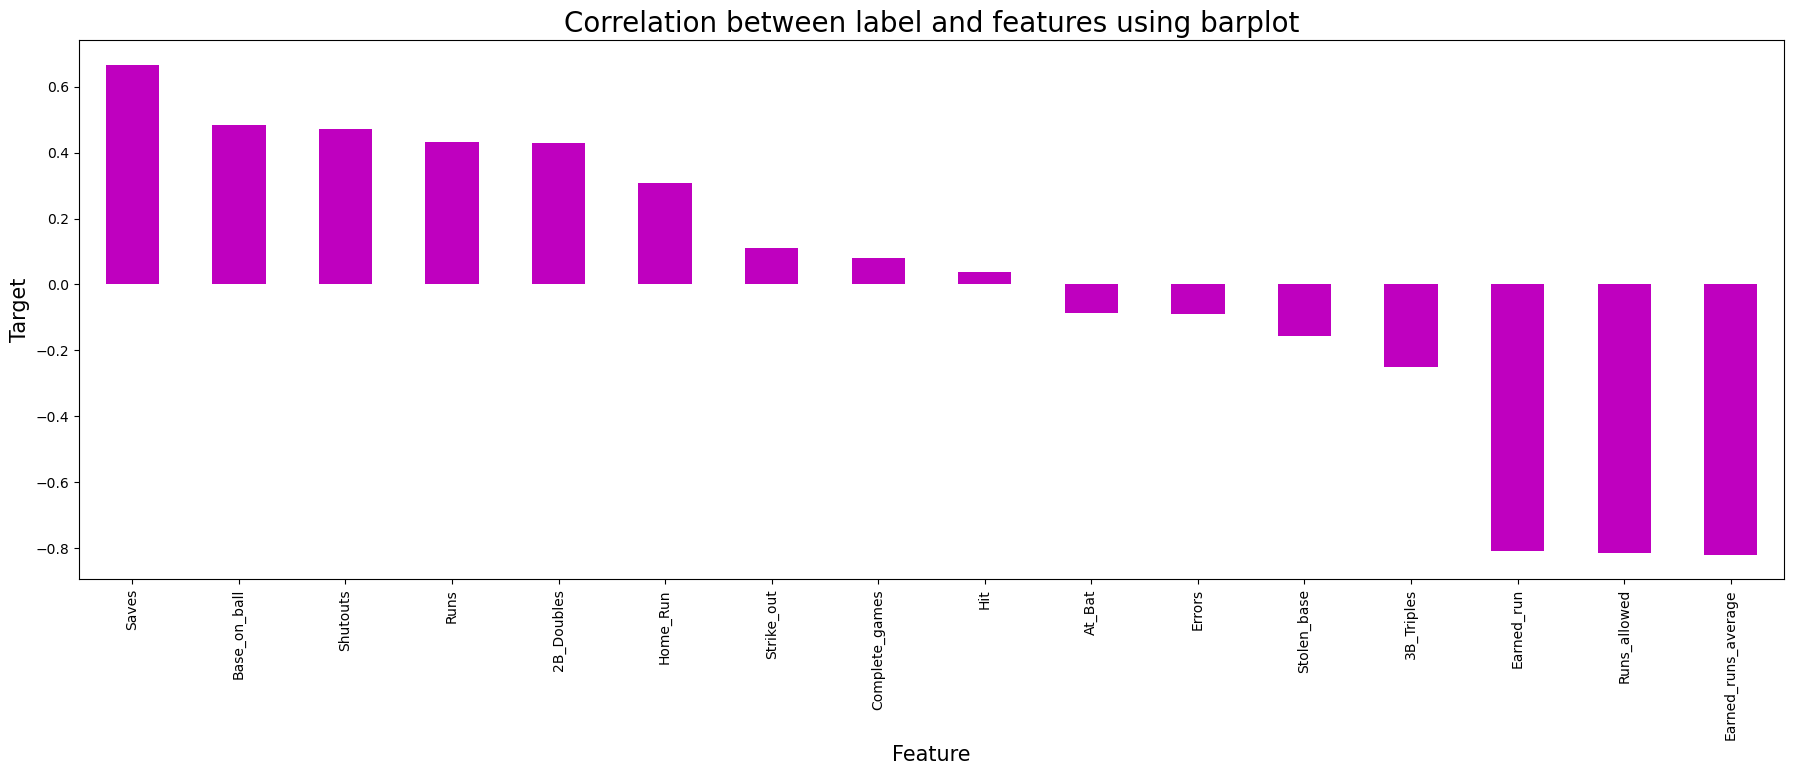

In [387]:
#Correlation map using bar plot

plt.figure(figsize = (22,7))
df1.corr()['Wins'].sort_values(ascending=False).drop(['Wins']).plot(kind='bar',color ="m")
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()


The above correlation map shows the following relationships of variables:

Columns R, HR, 2B, BB, SHO, SV are well correlated with the target variable (W).

Columns AB, H, 3B, SO, SB, CG, E are weakly correlated with the target variable (both positively and negatively).

Columns RA, ER, ERA are highly negatively correlated with the target variable. We have to further check if we can drop any of them.

RA, ER, ERA are highly correlated with each other. These features can bias the result. We have to make a decision on them.

AB and H are strongly correlated with each other (74%).

<AxesSubplot:xlabel='Runs', ylabel='Wins'>

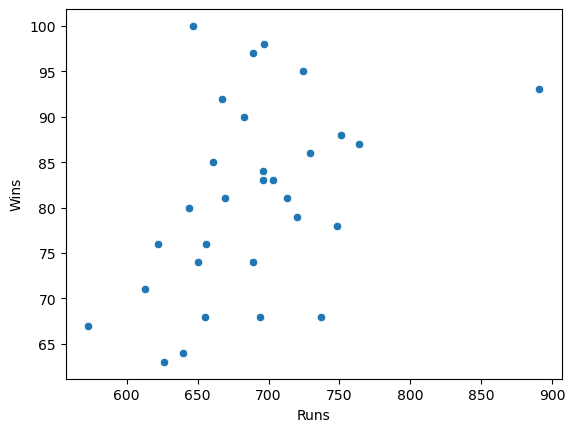

In [388]:
# Runs scored vs Win

sns.scatterplot('Runs','Wins',data=df1)

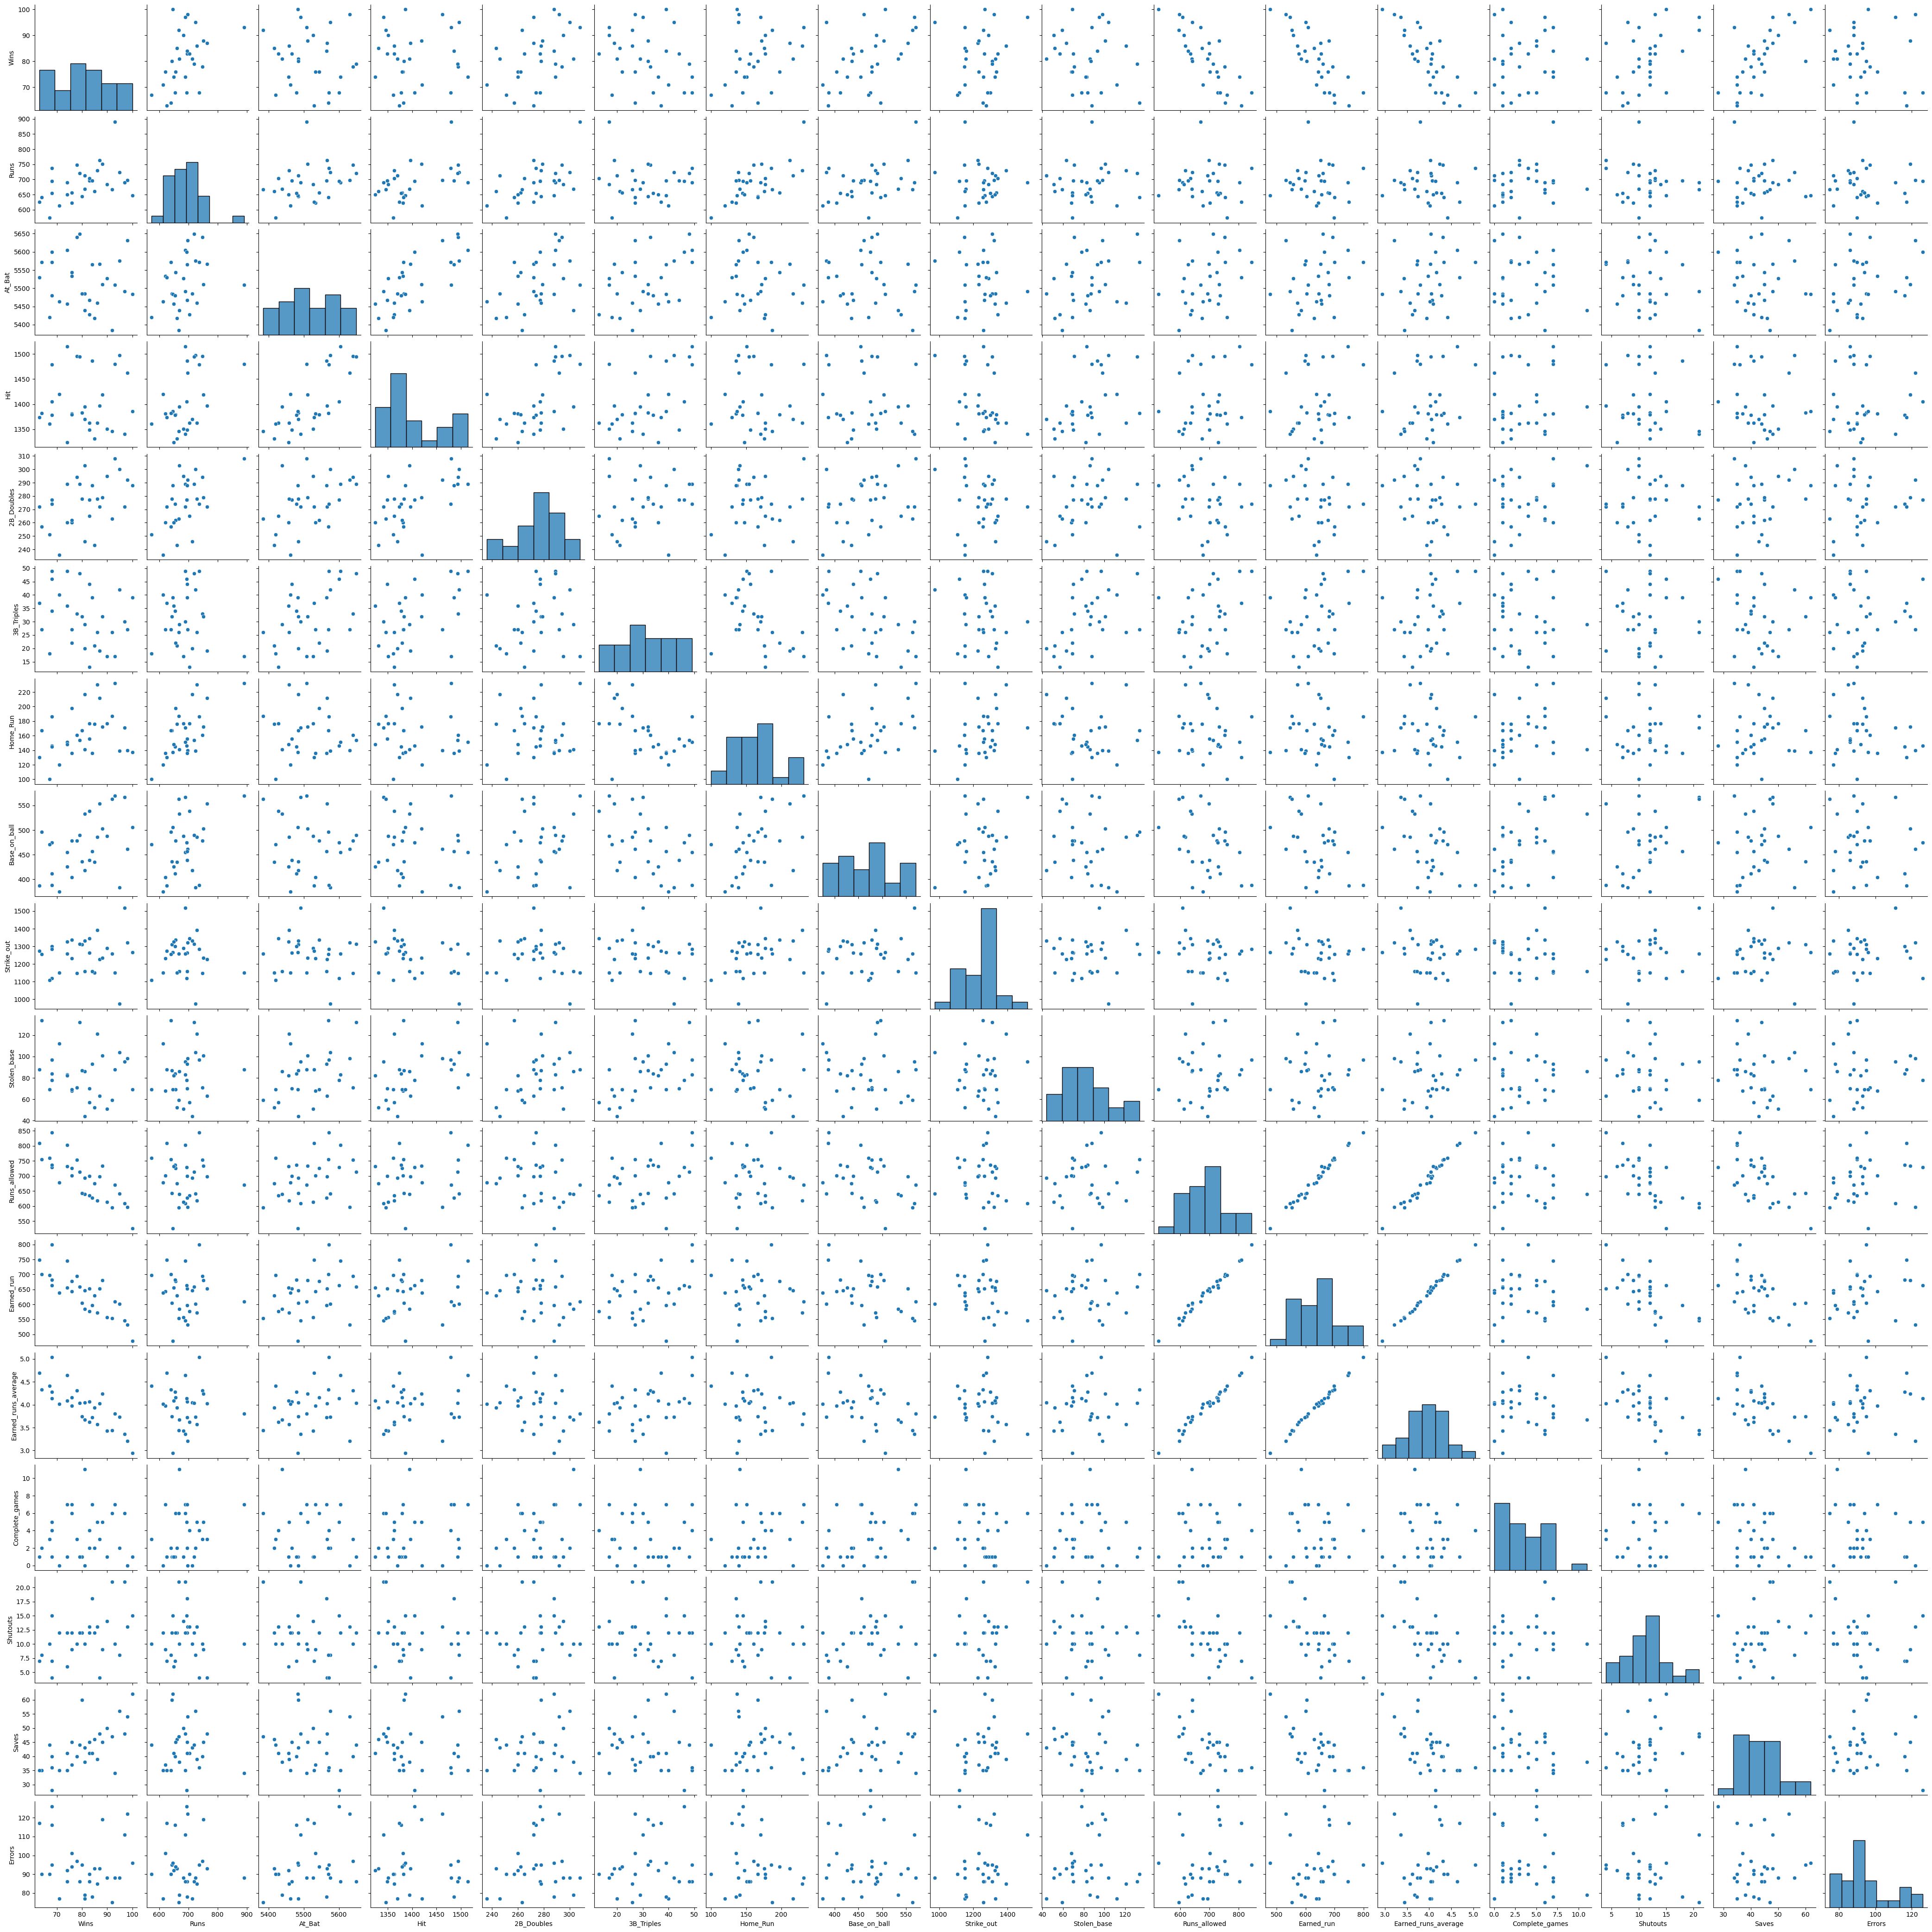

In [177]:
#Lets check different variables plots

sns.pairplot(df1)

# Checking for Outlier

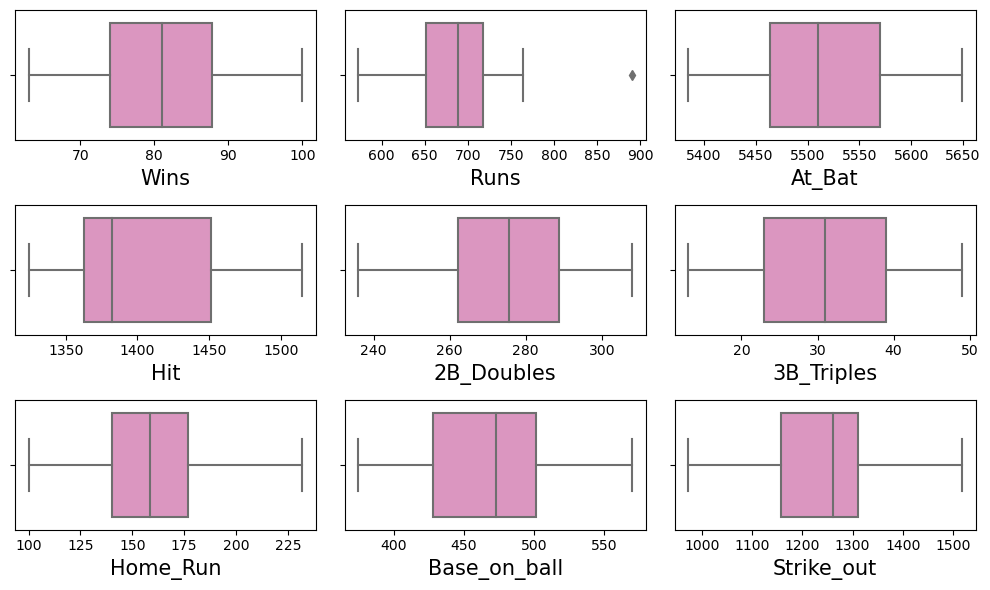

In [389]:
#lets check the outliers by plotting boxplot of column

plt.figure(figsize = (10,6), facecolor ="white")
plotnumber = 1 
for col in df1:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df1[col],palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()


In [390]:
df1.columns


Index(['Wins', 'Runs', 'At_Bat', 'Hit', '2B_Doubles', '3B_Triples', 'Home_Run',
       'Base_on_ball', 'Strike_out', 'Stolen_base', 'Runs_allowed',
       'Earned_run', 'Earned_runs_average', 'Complete_games', 'Shutouts',
       'Saves', 'Errors'],
      dtype='object')

In [391]:
#by using z score, we get rid of outlier

from scipy.stats import zscore

out_features=df1[['Wins','Runs','At_Bat','Hit','2B_Doubles','3B_Triples','Home_Run','Base_on_ball',
                    'Strike_out', 'Stolen_base', 'Runs_allowed','Earned_run', 'Earned_runs_average', 
                     'Complete_games', 'Shutouts','Saves', 'Errors']]
z=np.abs(zscore(out_features))
z

,Wins,Runs,At_Bat,Hit,2B_Doubles,3B_Triples,Home_Run,Base_on_ball,Strike_out,Stolen_base,Runs_allowed,Earned_run,Earned_runs_average,Complete_games,Shutouts,Saves,Errors
0,1.365409,0.619078,0.847731,1.663685,1.420173,1.041193,0.787299,1.534902,2.697630,0.913883,0.666234,0.505110,0.506955,0.539806,0.814629,1.671607,0.461470
1,0.197838,0.134432,0.711094,0.970681,0.127403,1.235809,0.243967,0.536592,0.154878,0.601826,0.165971,0.248930,0.254598,0.539806,0.172800,0.249879,0.607197
2,0.003243,0.332906,1.115233,0.151891,1.588795,0.223808,0.723377,1.139144,0.893982,0.111449,0.680339,0.751623,0.641347,2.772641,0.320914,0.654856,1.117242
3,0.483244,1.146419,0.241522,0.401088,0.828122,0.418423,0.883181,1.160536,0.168602,0.690985,0.180076,0.103922,0.053010,1.300442,0.567771,0.784104,0.485758
4,0.677839,0.013270,1.280738,1.984081,0.801892,1.722347,0.403770,0.251360,0.105866,0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,1.042600,0.607197
5,1.170814,3.509647,0.104884,1.361089,1.869832,1.391501,2.185047,1.798742,0.952796,0.200609,0.257184,0.389104,0.350165,1.300442,0.320914,1.171848,0.461470
6,0.587028,1.311430,0.732263,0.116292,0.153633,1.196885,1.545833,1.513510,0.207812,0.913883,0.137760,0.234429,0.165003,0.171757,1.802057,0.637623,0.097152
7,0.003243,0.428681,0.451289,0.596886,1.615025,1.099578,1.705636,0.910958,0.811641,1.760897,0.067235,0.147424,0.209800,1.275906,0.320914,0.008617,1.262970
8,0.094054,0.765626,0.451289,0.365489,0.183611,0.068115,0.107601,0.590073,0.605790,0.156029,0.652129,0.461608,0.484557,0.907856,0.172800,2.188598,0.048576
9,0.288649,1.034489,1.785913,1.628086,1.082929,0.165423,0.084163,0.158660,0.982204,0.557246,0.913544,0.843461,0.792164,0.171757,0.320914,0.396360,0.194303


In [392]:
#threshold =3
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [439]:
df2=df1[(z<3).all(axis=1)]
df2.shape

(29, 17)

In [440]:
#shape of old and new dataframe

print("old data frame",df1.shape[0])
print("new data frame",df2.shape[0])

old data frame 30
new data frame 29


In [441]:
print("Data loss percentage",((df1.shape[0]-df2.shape[0])/df1.shape[0])*100)

Data loss percentage 3.3333333333333335


In [442]:
df2.shape

(29, 17)

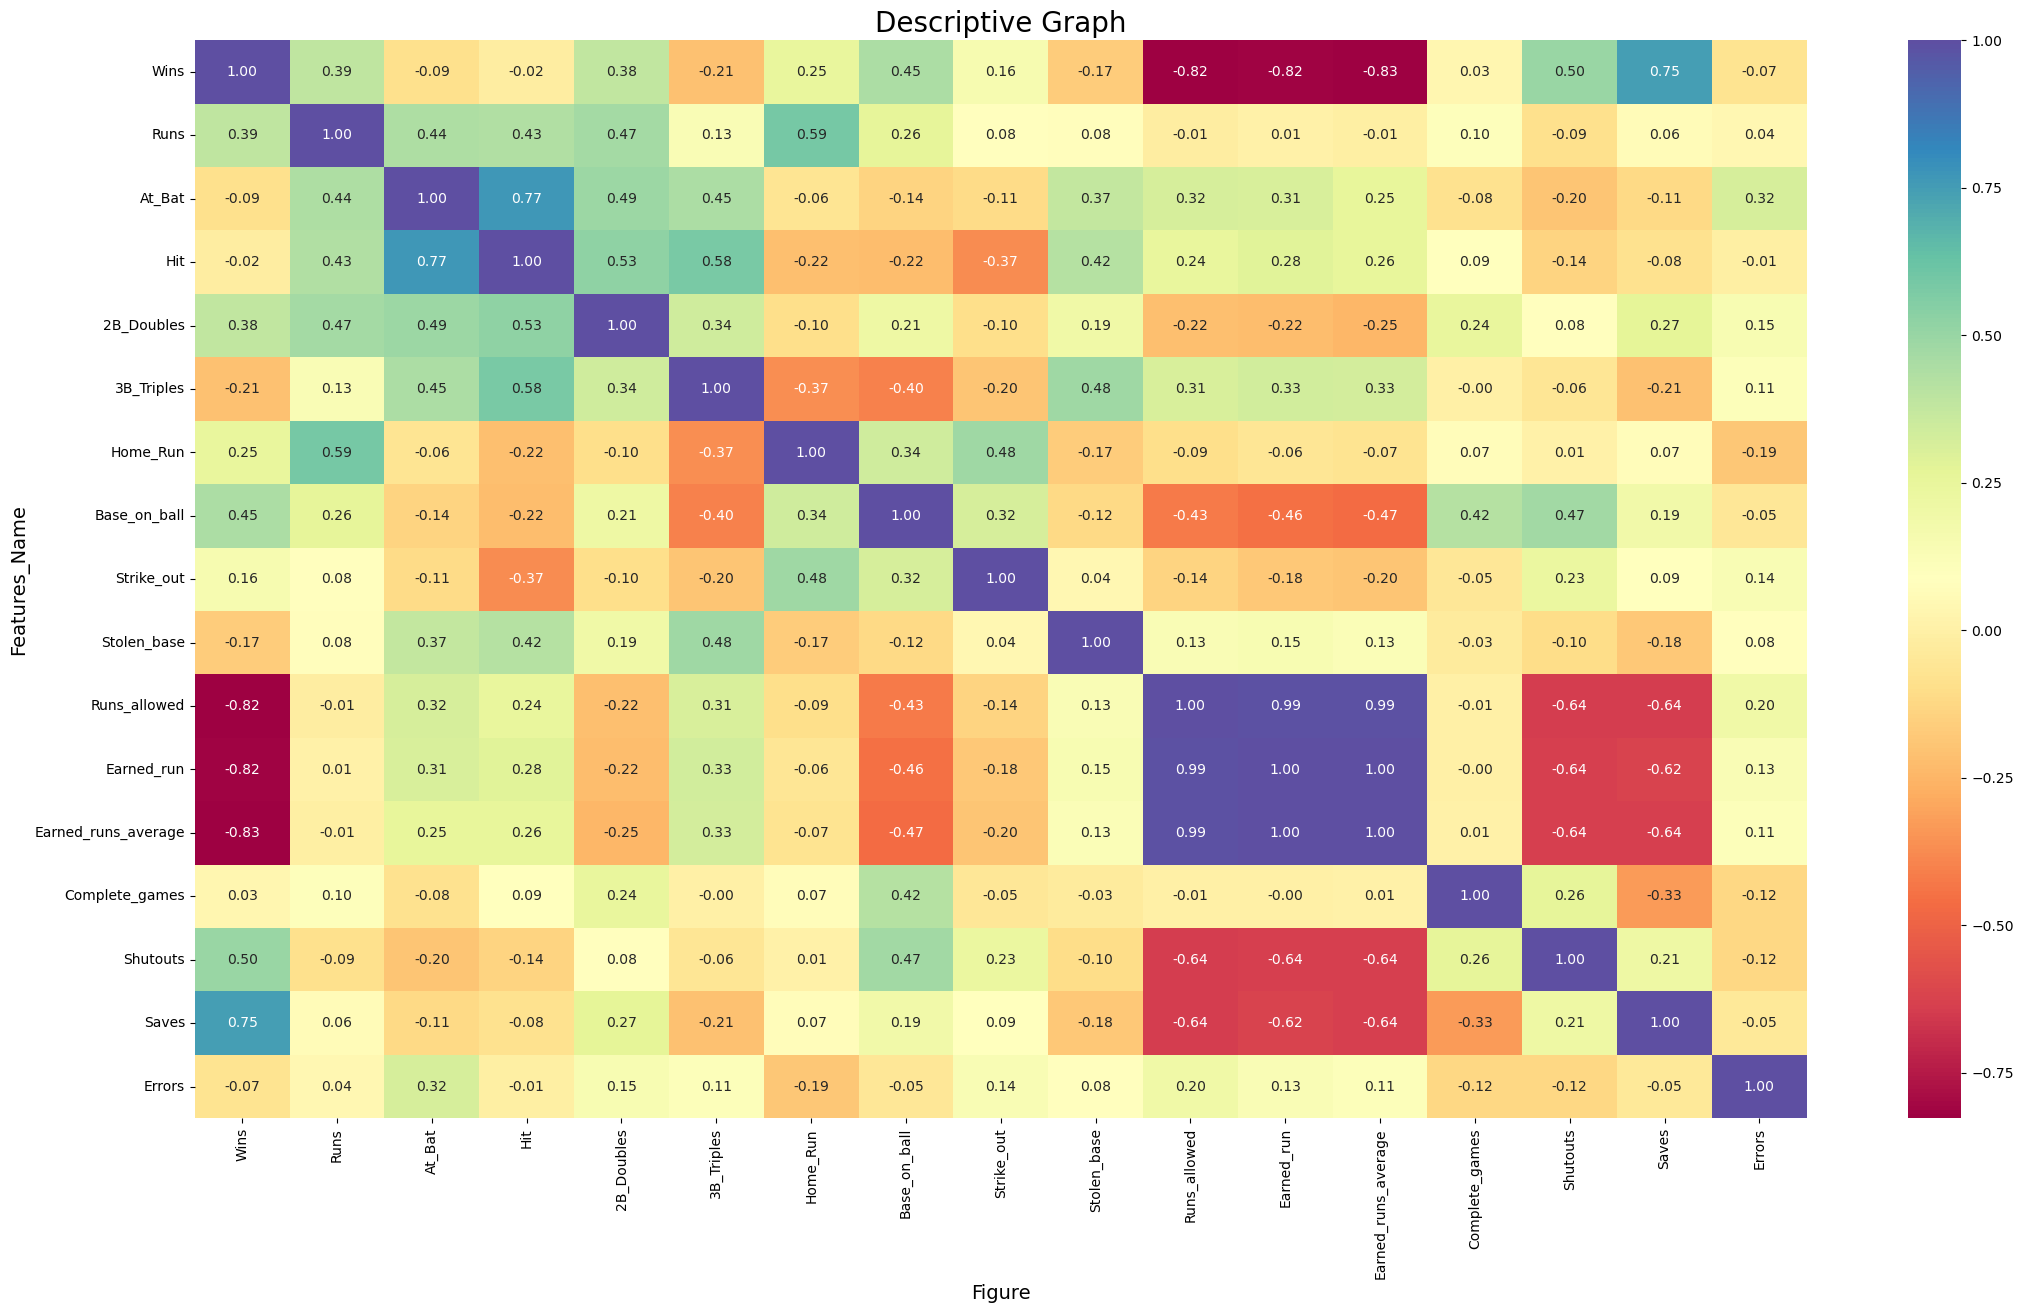

In [443]:
plt.figure(figsize=(26,14))
sns.heatmap(df2.corr(),annot =True, fmt ='0.2f',linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features_Name',fontsize=14)
plt.title('Descriptive Graph',fontsize=20)
plt.show()

In [444]:
# let drop the less correlated variable from the table 

df2=df2.drop('Hit',axis=True)

In [445]:
df2.corr()

,Wins,Runs,At_Bat,2B_Doubles,3B_Triples,Home_Run,Base_on_ball,Strike_out,Stolen_base,Runs_allowed,Earned_run,Earned_runs_average,Complete_games,Shutouts,Saves,Errors
Wins,1.000000,0.390451,-0.085780,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.029594,0.497526,0.749290,-0.072858
Runs,0.390451,1.000000,0.438022,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.101438,-0.085108,0.061381,0.043123
At_Bat,-0.085780,0.438022,1.000000,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.078511,-0.198872,-0.113342,0.316297
2B_Doubles,0.384886,0.469293,0.490752,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.244856,0.084060,0.269999,0.145032
3B_Triples,-0.206737,0.134204,0.445604,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.003733,-0.058896,-0.210627,0.108610
Home_Run,0.245697,0.586894,-0.064653,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.065978,0.005546,0.066984,-0.189790
Base_on_ball,0.447513,0.258450,-0.137850,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.417437,0.473922,0.187101,-0.050114
Strike_out,0.156469,0.081158,-0.111243,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.053075,0.231230,0.091394,0.142740
Stolen_base,-0.169503,0.075323,0.373674,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.030708,-0.104602,-0.179741,0.082702
Runs_allowed,-0.823176,-0.013858,0.315499,-0.215196,0.312750,-0.092586,-0.425381,-0.140570,0.134315,1.000000,0.991286,0.986781,-0.005288,-0.641579,-0.642734,0.195846


<AxesSubplot:xlabel='Runs', ylabel='Wins'>

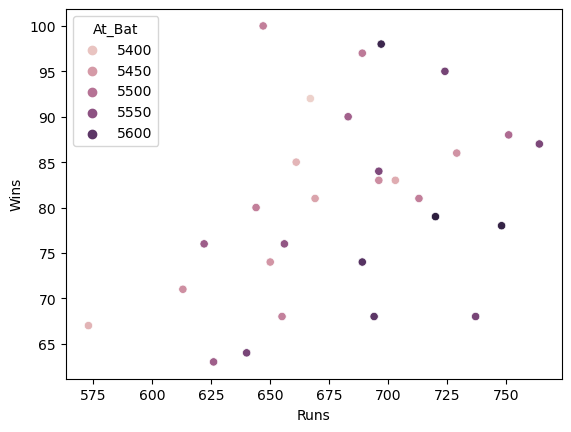

In [446]:
#Lets check the scatter plot of At_bat on run and win 

sns.scatterplot('Runs','Wins',hue='At_Bat',data=df2) 


<AxesSubplot:xlabel='Earned_run', ylabel='Runs_allowed'>

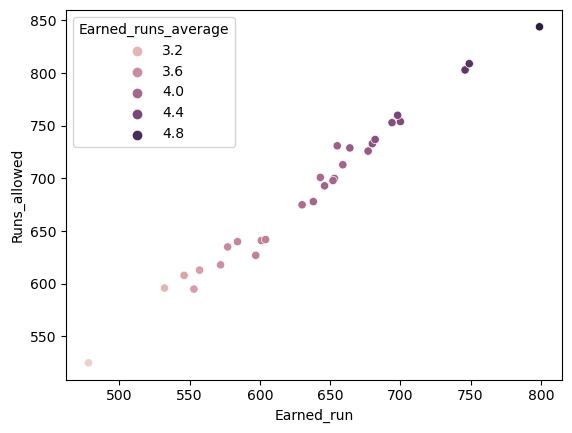

In [447]:
# Lets check graph of ER and RA

sns.scatterplot('Earned_run','Runs_allowed',hue='Earned_runs_average',data=df2) 


In [448]:
df2.skew()

Wins                   0.119013
Runs                  -0.215364
At_Bat                 0.169573
2B_Doubles            -0.335304
3B_Triples             0.090124
Home_Run               0.450862
Base_on_ball           0.151193
Strike_out            -0.233815
Stolen_base            0.494966
Runs_allowed           0.018155
Earned_run             0.018461
Earned_runs_average    0.016693
Complete_games         0.854980
Shutouts               0.526943
Saves                  0.627480
Errors                 0.840271
dtype: float64

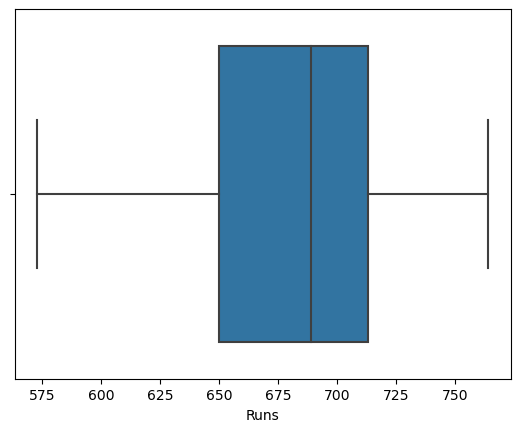

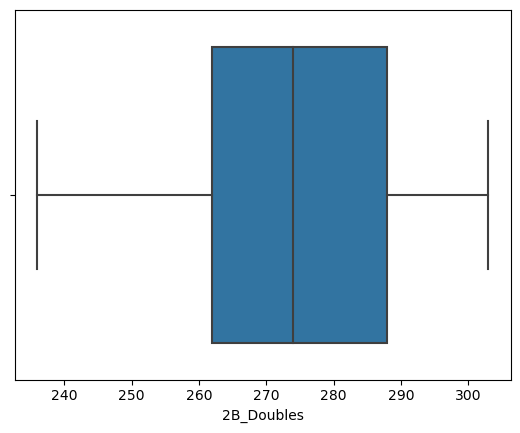

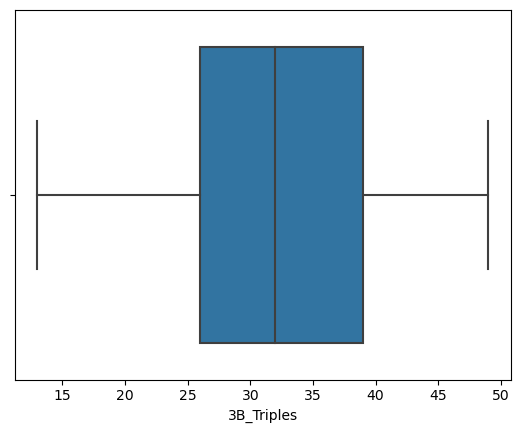

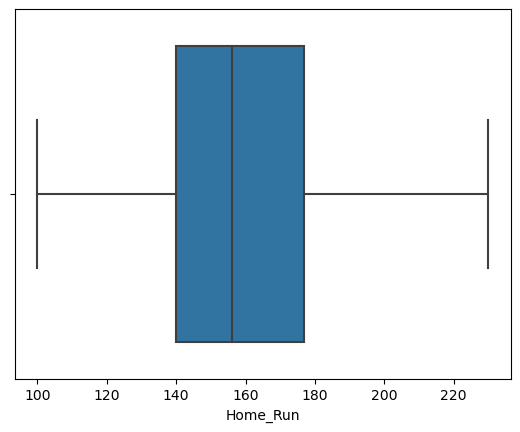

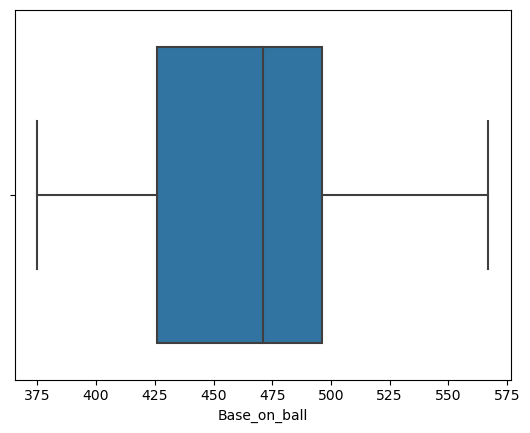

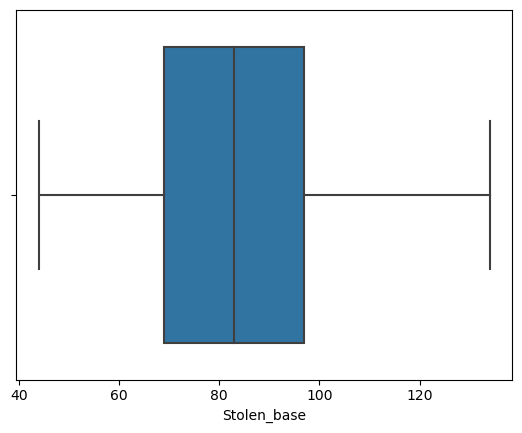

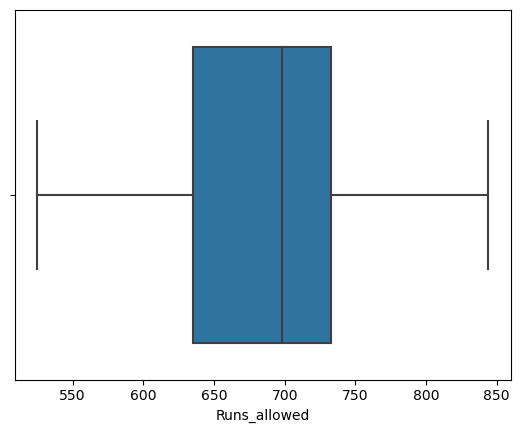

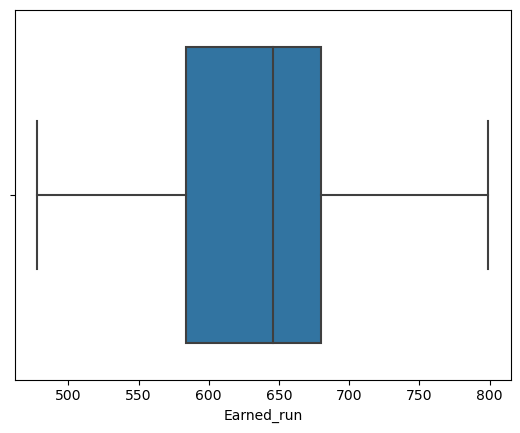

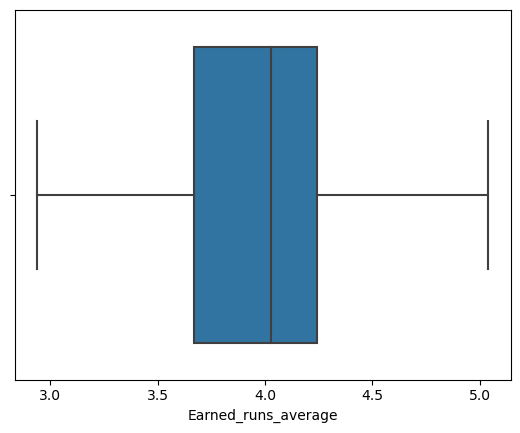

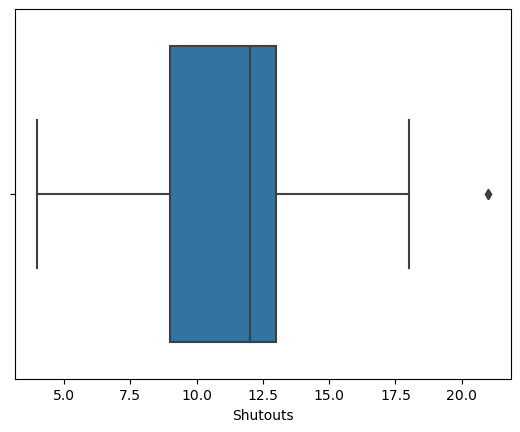

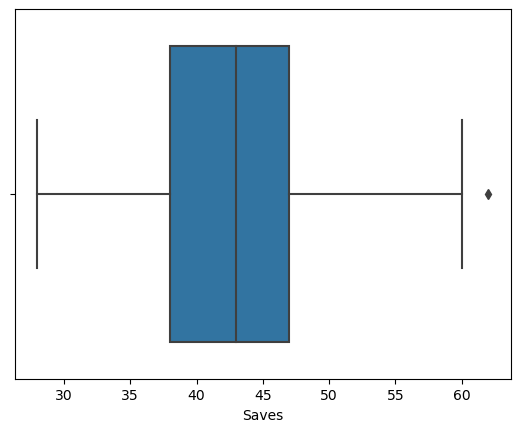

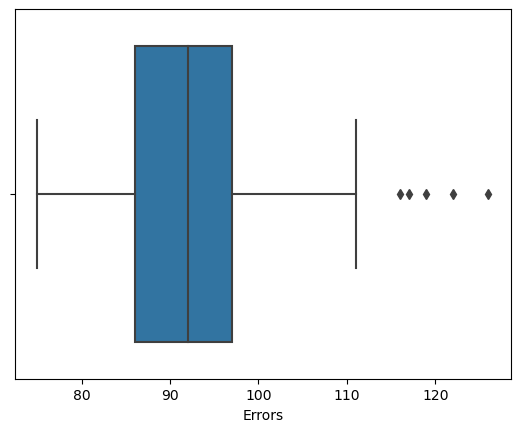

In [425]:
#Again check for outliers

for i in x.columns:
    sns.boxplot(x[i])
    plt.show()

### Feature Scaling using Standard Scalarization

In [515]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns =x.columns)
x

,Runs,2B_Doubles,3B_Triples,Home_Run,Base_on_ball,Stolen_base,Runs_allowed,Earned_run,Earned_runs_average,Shutouts,Saves,Errors
0,0.959398,1.556538,1.010845,-0.765863,-1.536359,0.905953,-0.664514,-0.511148,-0.511388,-0.813262,1.643157,-0.471091
1,0.331147,0.201171,1.208917,-0.181389,-0.495021,-0.585315,0.154638,0.232161,0.238952,0.159299,0.211006,-0.614898
2,-0.274666,1.733325,-0.276617,-0.697101,1.252941,0.116458,-0.678397,-0.754153,-0.643801,-0.326982,-0.700362,-1.118222
3,-1.329231,-0.800621,-0.474688,-0.869006,-1.145857,-0.673037,0.168522,0.089217,0.040333,-0.570122,-0.830557,0.463653
4,0.174084,0.908319,1.704094,-0.353293,-0.197495,-0.015124,1.584683,1.561540,1.496876,0.159299,-1.090948,-0.614898
5,1.856900,-0.093474,-1.266972,1.743939,1.643442,-0.892341,0.126870,0.217866,0.150677,-1.785822,0.601593,-0.111574
6,0.712585,-1.625627,-1.167936,1.915843,-0.885522,-1.725697,0.057451,0.132100,0.194815,-0.326982,-0.049384,-1.262029
7,-0.835605,0.260100,0.020490,0.196801,-0.550807,0.160319,-0.650630,-0.468265,-0.489319,0.159299,2.163939,0.032233
8,1.497899,1.202964,0.119526,-0.009484,0.230197,-0.541454,0.890486,0.818231,0.768604,-0.326982,-0.439971,0.176039
9,1.565212,0.319029,0.020490,0.368705,0.695081,0.774370,0.612808,0.618110,0.614123,-0.570122,0.211006,1.757915


In [516]:
## Correlation level between target variable and independent variables
df2.corr()['Wins'].sort_values()

Earned_runs_average   -0.826952
Runs_allowed          -0.823176
Earned_run            -0.815308
3B_Triples            -0.206737
Stolen_base           -0.169503
At_Bat                -0.085780
Errors                -0.072858
Complete_games         0.029594
Strike_out             0.156469
Home_Run               0.245697
2B_Doubles             0.384886
Runs                   0.390451
Base_on_ball           0.447513
Shutouts               0.497526
Saves                  0.749290
Wins                   1.000000
Name: Wins, dtype: float64

In [451]:
x.skew()

Runs                  -0.215364
2B_Doubles            -0.335304
3B_Triples             0.090124
Home_Run               0.450862
Base_on_ball           0.151193
Stolen_base            0.494966
Runs_allowed           0.018155
Earned_run             0.018461
Earned_runs_average    0.016693
Shutouts               0.526943
Saves                  0.627480
Errors                 0.840271
dtype: float64

# VIF to find multicolinearity


In [517]:
#Finding variance inflaction factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,3.472778,Runs
1,2.490344,2B_Doubles
2,3.098080,3B_Triples
3,3.203796,Home_Run
4,2.540349,Base_on_ball
5,1.669059,Stolen_base
6,131.462742,Runs_allowed
7,519.124361,Earned_run
8,314.149889,Earned_runs_average
9,3.163282,Shutouts


In [518]:
#we will be dropping the highest level VIF from the table

x.drop(["Runs_allowed","Earned_run","Earned_runs_average"],axis=1,inplace=True)

In [519]:
#Rechecking VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,3.336422,Runs
1,2.270638,2B_Doubles
2,2.564731,3B_Triples
3,2.952086,Home_Run
4,2.207497,Base_on_ball
5,1.369255,Stolen_base
6,1.593349,Shutouts
7,1.301032,Saves
8,1.097736,Errors


Now we can move on to the next step

## Seperating features and label

In [520]:
#Seperating the independent and target variables into x and y
x = df2.drop(['Wins','Complete_games','Strike_out','At_Bat'],axis=1)
y = df2['Wins']

print("Feature Dimension",x.shape)
print("Label Dimension",y.shape)

Feature Dimension (29, 12)
Label Dimension (29,)


# Creating train test split


In [521]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor as knn


In [522]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.experimental import enable_hist_gradient_boosting


In [589]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

maxR2 = -float('inf') # we are using this to set the large value so we are able to work with our model with continous variables
maxRS = 0

for i in range(1, 30):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    knn = KNeighborsRegressor()
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    r2 = r2_score(y_test, pred)
    if r2 > maxR2:
        maxR2 = r2
        maxRS = i

print("Max r2 score is", maxR2, "at random_state", maxRS)


Max r2 score is 0.7066235655406496 at random_state 23


# Modeling


In [583]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create the Linear Regression model
lr = LinearRegression()
lr.fit(x_train, y_train)
# Make predictions on the test set
pred_lr = lr.predict(x_test)
# Calculate the R-squared to evaluate the model's performance
r2 = r2_score(y_test, pred_lr)
print("R-squared score:", r2)


R-squared score: 0.736408660260057


In [590]:
# Create the Random Forest Regression model
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC=RFC.predict(x_test)
r2 = r2_score(y_test, predRFC)
print("R-squared score:", r2)


R-squared score: 0.48812026913372586


In [555]:
# Create the Logistic Regression model
LR= LogisticRegression()
LR.fit(x_train, y_train)
predLR=LR.predict(x_test)
r2 = r2_score(y_test, predLR)
print("R-squared score:", r2)


R-squared score: 0.673202614379085


In [556]:
# Create the SVC Regression model
svc = SVC()
svc.fit(x_train, y_train)
predsvc=svc.predict(x_test)
r2 = r2_score(y_test, predsvc)
print("R-squared score:", r2)


R-squared score: -1.3616557734204795


In [557]:
# Create the BaggingClassifier

BC=BaggingClassifier()
BC.fit(x_train, y_train)
predBC=BC.predict(x_test)
r2 = r2_score(y_test, predBC)
print("R-squared score:", r2)

R-squared score: 0.4226579520697168


In [585]:
# Create the KNeighbors classifier just to see the accuracy if we consider it

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
accuracy = r2_score(y_test, pred_knn)
print("Accuracy:", accuracy)

Accuracy: 0.32570806100217864


# Hyperparameter Tuning

Hyperparameter tuning is the art of finding the best settings for a machine learning model

Hyperparameters are the knobs that control the learning process, such as learning rate, number of layers, or Different hyperparameters can lead to different levels of accuracy, speed, and complexity for the same model and data

In [587]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

#we choose linear regression model 
lr = LinearRegression()

param_grid = {'fit_intercept': [True, False],'normalize': [True, False] }

grid = GridSearchCV(lr, param_grid, cv=3)
grid.fit(x_train, y_train)
print(grid.best_params_)

{'fit_intercept': False, 'normalize': True}


In [567]:
# Fitting our GridSearchCV Object

grid.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [568]:
grid.best_params_

{'fit_intercept': False, 'normalize': True}

In [586]:
#Create a final model using logistic fit

Final_model =LinearRegression()

Final_model.fit(x_train,y_train)

#predict the target variable using the test data
y_prediction= Final_model.predict(x_test)
y_prediction
acc = r2_score(y_test,pred)
print(acc*100)

84.71459694989105


# saving the model


In [570]:
import joblib
joblib.dump(Final_model,"Baseball_model.pkl")

['Baseball_model.pkl']

# Predicting the saved model


In [571]:
#Lets load the saved model and get the prediction

model = joblib.load("Baseball_model.pkl")

#Prediction
y_prediction = model.predict(x_test)
y_prediction


array([93.08109702, 87.87045957, 67.87832774, 75.23405612, 85.79974853,
       70.78013095, 79.73925429, 89.28411766])

In [572]:
a= np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=y_prediction
df["Original"]=a
df

,Predicted,Original
0,93.081097,97
1,87.870460,83
2,67.878328,64
3,75.234056,67
4,85.799749,79
5,70.780131,76
6,79.739254,86
7,89.284118,92


# Final Analysis


In [ ]:
We used the Linear classification model to predit values of win against the given feature 

we are very close to the original values in our predicted model. 

